# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [1]:
import csv
import pandas as pd
import numpy as np
def data_parser():

    with open("stats.csv", "r") as file:
        reader_obj = csv.reader(file) 
        data = list(reader_obj)
        df = pd.DataFrame(data)
        df. columns=df. iloc[0]
        df.drop(0, inplace = True)
        df['p_formatted_ip'] = df['p_formatted_ip'].astype(float)
        to_removeIP = np.where(df['p_formatted_ip'] < 50)
        to_list = list(to_removeIP)
        df.drop(to_list[0] + 1, inplace = True)
        df.reset_index(inplace = True)
        df.sort_values(by = ['p_era', 'fastball_avg_spin'], ascending = False, inplace = True)
        df.reset_index(inplace = True)
        df.drop('n_kn_formatted', axis = 1, inplace = True)
        df.drop('kn_avg_spin', axis = 1, inplace = True)
        df.replace('', np.nan, inplace=True)
        df.dropna(thresh=df.shape[1] - 5, inplace = True)
        df.drop('level_0', axis = 1, inplace = True)
        df.drop('index', axis = 1, inplace = True)
        df.reset_index(inplace = True)
        df.drop('index', axis = 1, inplace = True)

        return df
        
        
    with open("stats_cleaned.csv", "w") as file:
        file = df.to_csv(file)

############ Function Call ############
data_parser()

,﻿last_name,first_name,player_id,year,p_game,p_formatted_ip,p_win,p_loss,p_era,z_swing_miss_percent,...,cu_avg_spin,n_sift_formatted,si_avg_spin,n_fc_formatted,fc_avg_spin,n_fs_formatted,fs_avg_spin,n_fastball_formatted,fastball_avg_spin,
0,Keuchel,Dallas,572971,2022,14,60.2,2,9,9.20,11.7,...,NaN,44,1940,15.3,2167,NaN,NaN,65.8,2017,NaN
1,Hernandez,Carlos,672578,2022,27,56.0,0,5,7.39,17.9,...,2282,0.3,2301,NaN,NaN,10.2,1183,50,2365,NaN
2,Adon,Joan,672851,2022,14,64.2,1,12,7.10,12.8,...,2263,3.8,2144,NaN,NaN,NaN,NaN,69.4,2184,NaN
3,Davidson,Tucker,656353,2022,12,52.0,2,7,6.75,11.7,...,2473,1.3,1960,NaN,NaN,0.5,1212,43,2015,NaN
4,Corbin,Patrick,571578,2022,31,152.2,6,19,6.31,12.6,...,1944,43.6,2069,NaN,NaN,NaN,NaN,62.3,2085,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Kershaw,Clayton,477132,2022,22,126.1,12,3,2.28,17.3,...,2395,0.4,2390,NaN,NaN,NaN,NaN,40.4,2407,NaN
152,Alcantara,Sandy,645261,2022,32,228.2,14,9,2.28,18.3,...,2350,24.8,2293,NaN,NaN,NaN,NaN,50,2246,NaN
153,Cease,Dylan,656302,2022,32,184.0,14,8,2.20,23.5,...,2697,1,2492,NaN,NaN,NaN,NaN,40.7,2507,NaN
154,Ottavino,Adam,493603,2022,66,65.2,6,3,2.06,19.2,...,NaN,32.5,2253,5.2,2564,NaN,NaN,50,2310,NaN


## Web Collection Requirement \#1


In [4]:
import requests
from bs4 import BeautifulSoup
from itertools import cycle
def web_parser1():

    url = "https://www.espn.com/mlb/stats/player/_/view/pitching/season/2022/seasontype/2/table/pitching/sort/ERA/dir/asc"
    base_url = "https://www.espn.com"

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.table

    player_name_element = soup.find_all('a', class_='AnchorLink')
    names_stats = []
    stats_l = []
    table_dict = {}
    for name in player_name_element:
        player_name_headers = name.text.strip()
        names_stats.append(player_name_headers) 

    player_stats = soup.find_all('td', class_= 'Table__TD')
    for numbers in player_stats:
        player_rows = numbers.text.strip()
        stats_l.append(player_rows)

    stats_l = stats_l[90:900]
    stats_rows = []



    names = names_stats[27:72]
    stats_headers = names_stats[72:88]
    #    print(names)
    #    print(stats_headers)
    #    print(stats_l)


    headers = ["Type",'GP','GS', 'QS', 'ERA', 'W', 'L', 'SV', 'HLD', 'IP', 'H', 'ER', 'HR', 'BB', 'K', 'K/9', 'WAR', 'WHIP']
    zipped = list(zip(cycle(headers), stats_l))
    nameCount = 0
    counter = 1
    newlist = []
    finList = []
    for elem in zipped:
        if newlist == []:
            newlist.append(('Name', names[nameCount]))
        newlist.append(elem)
        if counter % 18 == 0:
            finList.append(newlist)
            newlist = []
            counter = 1
            nameCount += 1
        else:
            counter += 1
    print(finList)
    #    zipped_names = list(zip('Name', names))
    #    print(zipped_names)

    with open("player_stats.html", "w") as f:
        for listt in finList:
            f.write(str(listt))
            f.write("<br />")
            f.write("<br />")

############ Function Call ############
web_parser1()

[[('Name', 'Justin Verlander'), ('Type', 'SP'), ('GP', '28'), ('GS', '28'), ('QS', '21'), ('ERA', '1.75'), ('W', '18'), ('L', '4'), ('SV', '0'), ('HLD', '0'), ('IP', '175.0'), ('H', '116'), ('ER', '34'), ('HR', '12'), ('BB', '29'), ('K', '185'), ('K/9', '9.5'), ('WAR', '5.9'), ('WHIP', '0.83')], [('Name', 'Julio Urias'), ('Type', 'SP'), ('GP', '31'), ('GS', '31'), ('QS', '19'), ('ERA', '2.16'), ('W', '17'), ('L', '7'), ('SV', '0'), ('HLD', '0'), ('IP', '175.0'), ('H', '127'), ('ER', '42'), ('HR', '23'), ('BB', '41'), ('K', '166'), ('K/9', '8.5'), ('WAR', '4.9'), ('WHIP', '0.96')], [('Name', 'Dylan Cease'), ('Type', 'SP'), ('GP', '32'), ('GS', '32'), ('QS', '16'), ('ERA', '2.20'), ('W', '14'), ('L', '8'), ('SV', '0'), ('HLD', '0'), ('IP', '184.0'), ('H', '126'), ('ER', '45'), ('HR', '16'), ('BB', '78'), ('K', '227'), ('K/9', '11.1'), ('WAR', '6.4'), ('WHIP', '1.11')], [('Name', 'Alek Manoah'), ('Type', 'SP'), ('GP', '31'), ('GS', '31'), ('QS', '25'), ('ERA', '2.24'), ('W', '16'), ('L', 

## Web Collection Requirement #2

In [5]:
import requests
def web_parser2(team_number):

    url = "https://api-baseball.p.rapidapi.com/teams/statistics"
    
    querystring = {"league":"1","season":"2019","team":str(team_number)}
    

    headers = {
        "X-RapidAPI-Key": "406f85582fmshcb152a198576547p1d5195jsn3aa96d1e64d4",
        "X-RapidAPI-Host": "api-baseball.p.rapidapi.com"
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    if response.status_code == 200:
        teams_data = response.json()
        if 'response' in teams_data and len(teams_data['response']) > 0:
            teams = teams_data['response']
            print(f"All Teams Data:")
            team = teams['team']
            wl = teams['games']
            scored = teams['points']  
            against = scored['against']
        else:
            print("no team data found")
    else:
        print(f"Error: {response.status_code} - {response.text}")
        

    print(team['name'])
    print('Wins')
    print(wl['wins'])
    print('Loses')
    print(wl['loses'])

    with open('teams.html', 'a') as f:
        f.write(str(team['name']))
        f.write("<br />")
        f.write('Wins')
        f.write(str(wl['wins']))
        f.write("<br />")
        f.write('Loses')
        f.write(str(wl['loses']))
        f.write("<br />")

############ Function Call ############
with open('teams.html', 'w') as f:
    f.write('')
start_num = 2
end_num = 37
for team_number in range(start_num, end_num + 1):
    if team_number == 11 or team_number == 13 or team_number == 14 or team_number == 23 or team_number == 21 or team_number == 29:
        pass
    else:
        print(f"Fetching data for team {team_number}")
        web_parser2(team_number)

Fetching data for team 2
All Teams Data:
Arizona Diamondbacks
Wins
{'home': {'total': 51, 'percentage': '0.526'}, 'away': {'total': 45, 'percentage': '0.474'}, 'all': {'total': 96, 'percentage': '0.500'}}
Loses
{'home': {'total': 45, 'percentage': '0.464'}, 'away': {'total': 49, 'percentage': '0.516'}, 'all': {'total': 94, 'percentage': '0.490'}}
Fetching data for team 3
All Teams Data:
Atlanta Braves
Wins
{'home': {'total': 63, 'percentage': '0.612'}, 'away': {'total': 51, 'percentage': '0.548'}, 'all': {'total': 114, 'percentage': '0.582'}}
Loses
{'home': {'total': 40, 'percentage': '0.388'}, 'away': {'total': 42, 'percentage': '0.452'}, 'all': {'total': 82, 'percentage': '0.418'}}
Fetching data for team 4
All Teams Data:
Baltimore Orioles
Wins
{'home': {'total': 28, 'percentage': '0.295'}, 'away': {'total': 36, 'percentage': '0.371'}, 'all': {'total': 64, 'percentage': '0.333'}}
Loses
{'home': {'total': 66, 'percentage': '0.695'}, 'away': {'total': 59, 'percentage': '0.608'}, 'all':

All Teams Data:
Seattle Mariners
Wins
{'home': {'total': 42, 'percentage': '0.452'}, 'away': {'total': 34, 'percentage': '0.386'}, 'all': {'total': 76, 'percentage': '0.420'}}
Loses
{'home': {'total': 50, 'percentage': '0.538'}, 'away': {'total': 52, 'percentage': '0.591'}, 'all': {'total': 102, 'percentage': '0.564'}}
Fetching data for team 33
All Teams Data:
St.Louis Cardinals
Wins
{'home': {'total': 57, 'percentage': '0.576'}, 'away': {'total': 49, 'percentage': '0.480'}, 'all': {'total': 106, 'percentage': '0.527'}}
Loses
{'home': {'total': 40, 'percentage': '0.404'}, 'away': {'total': 51, 'percentage': '0.500'}, 'all': {'total': 91, 'percentage': '0.453'}}
Fetching data for team 34
All Teams Data:
Tampa Bay Rays
Wins
{'home': {'total': 58, 'percentage': '0.592'}, 'away': {'total': 55, 'percentage': '0.550'}, 'all': {'total': 113, 'percentage': '0.571'}}
Loses
{'home': {'total': 40, 'percentage': '0.408'}, 'away': {'total': 43, 'percentage': '0.430'}, 'all': {'total': 83, 'percenta

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. The first inconsistancy that I found was that not every player that I pulled from ESPN is on the google stat cast. This means I will not have their stat data so to deal with this I will just look at their teams wins and loss record comapared to how many games they have pitched. 

2. The second inconsistancey I found is that my data was when I was creating the first insight. Not every player in the biggest data set were in the smaller one. To fix this I right joined on the name and add my list of spin rates to the column that had all NaN values. 

3. The last inconsistancy I found in my large datasets was a lot of empty values. To fix this inconsistancy I found what pitches were thrown most often and used those. In this case the pitches were fastballs and curveballs so I only used those pitches when using spinrates. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source:
*   Web Collection #1 Source: 
*   Web Collection #2 Source:



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://youtu.be/azIJbU7O97M


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Topic Summary

Please provide a brief executive summary (5 sentences or less) discussing your topic:
My topic is over MLB pitchers. I am looking at pitching stats and pitch data to find the correlation between good pitchers. Through this I trying to find what is the most important factor in being a successful MLB pitcher. 

## Insights

In [2]:
from bs4 import BeautifulSoup
import re
import pandas as pd
def insight1():
    with open('stats.csv') as file1:
        reader_obj1 = csv.reader(file1) 
        data = list(reader_obj1)
        pitch_data = pd.DataFrame(data)
        fastball_spin = pitch_data[30]
        player_name = pitch_data[1] + ' ' + pitch_data[0]
        cols = {}
        final = pd.DataFrame(data = cols)
        names = []
        fas = []
        for name in player_name[1:]:
            names.append(name.strip(" "))
        for spin in fastball_spin[1:]:
            fas.append(spin)
        final.insert(loc=0, column='name', value=names)
        final.insert(loc=1, column='fastball_avg_spin', value=fas)
        final.dropna(axis = 0, inplace = True)
        drop = np.where(final['fastball_avg_spin'] == '')
        dropl = list(drop)
        for i in dropl:
            for a in i:
                final.drop(a, inplace = True)
        final.reset_index(inplace = True)
        final.drop('index', axis = 1, inplace = True)
        
    with open('player_stats.html') as html:
        ks_l = []
        names = []
        data = html.read()
        lists = data.split('[')
        for listt in lists[1:]:
            inside_list = listt.strip("<br /><br />").split(" ")
            ks = inside_list[32].strip(",")
            ks = ks.strip("')")
            ks = int(ks)      
            ks_l.append(ks)
            name = (inside_list[1] + " " + inside_list[2]).strip(",")
            name = name.strip("')")
            names.append(name)
        cols2 = {}
        players = pd.DataFrame(data = cols2)
        players.insert(loc=0, column='name', value=names)
        players.insert(loc=1, column="K's", value=ks_l)
        
        merged = final.merge(players, on="name", how = 'right')
        merged.sort_values(by="K's", inplace=True, ascending = False)
        merged['fastball_avg_spin'] = pd.to_numeric(merged['fastball_avg_spin'], downcast = 'integer')
        mean = merged["K's"].mean()
        mean = round(float(mean))
        count = 0
        for num in merged['fastball_avg_spin']:
            count += int(num)
        spinmean = count / 44
        print('Fastball Average Spin Rate:')
        print(round(spinmean, 2))
        merged.reset_index(inplace=True)
        merged.drop('index', axis= 1, inplace = True)
        maxf = merged['fastball_avg_spin'].max()
        maxf = int(maxf)
        maxk = 257
        merged["Difference From Max K's"] = maxk - merged["K's"]
        merged['Difference From Fastball Spin Rate'] = maxf - merged['fastball_avg_spin']
        
        
        pitch_data.to_csv("SPINK'S.csv")
        return merged.loc[merged["K's"] > mean]
    
        
        
############ Function Call ############
insight1()

Fastball Average Spin Rate:
2319.91


,name,fastball_avg_spin,K's,Difference From Max K's,Difference From Fastball Spin Rate
0,Gerrit Cole,2434,257,0,177
1,Corbin Burnes,2611,243,14,0
2,Carlos Rodon,2349,237,20,262
3,Aaron Nola,2262,235,22,349
4,Dylan Cease,2507,227,30,104
5,Shohei Ohtani,2232,219,38,379
6,Robbie Ray,2250,212,45,361
7,Sandy Alcantara,2246,207,50,365
8,Charlie Morton,2368,205,52,243
9,Kevin Gausman,2265,205,52,346


### Insight 1 Explanation

This insight shows the relationship between average spin on the pitchers fastball compared to their total strikeouts. The reason I compared these two stats is because I have been taught that the more spin you have on the baseball the harder it is too hit. I found the average of K's for all the pitchers than eliminated all the pitchers below that line. I also add a column that shows the difference from the max and the actual spin rate and strikeouts. 

In [31]:
def insight2():
    with open('stats_cleaned.csv') as file1:
        reader_obj1 = csv.reader(file1) 
        data = list(reader_obj1)
        pitch_data = pd.DataFrame(data)
        pitch_data.columns = pitch_data.loc[0]
        pitch_data.drop(0, inplace = True)
        pitch_data.reset_index(inplace = True)
        pitch_data.drop("", axis = 1, inplace = True)
        pitch_data.drop("index", axis = 1, inplace = True)
        pitch_data['p_win'] = pd.to_numeric(pitch_data['p_win'], downcast = 'float')
        pitch_data['fastball_avg_spin'] = pd.to_numeric(pitch_data['fastball_avg_spin'], downcast = 'float')
        pitch_data.sort_values(by=['p_win'], inplace = True, ascending = False)
        pitch_data.drop(['player_id', 'year','p_formatted_ip','p_loss','p_era','z_swing_miss_percent','oz_swing_miss_percent','n','n_ff_formatted','ff_avg_spin','n_sl_formatted','sl_avg_spin','n_ch_formatted','ch_avg_spin','n_cukc_formatted','cu_avg_spin','n_sift_formatted','si_avg_spin','n_fc_formatted','fc_avg_spin','n_fs_formatted','fs_avg_spin','n_fastball_formatted'],axis=1, inplace = True)
        pitch_data.reset_index(inplace = True)
        pitch_data.drop('index', axis=1, inplace = True)
        pitch_data = pitch_data.astype({'p_win':'float'})
        pitch_data = pitch_data.astype({'p_game':'float'})

        
        spinmean = pitch_data['fastball_avg_spin'].mean()
        print('Fastball Average Spin Rate:')
        print(round(spinmean, 2))
        mean = pitch_data['p_win'].mean()
        mean = round(float(mean))
        pitch_data = pitch_data.loc[pitch_data['p_win'] >= mean]
        pitch_data["Win Percentage"] = round((pitch_data['p_win'] / pitch_data['p_game']) * 100 , 2)   
        pitch_data.to_csv('WINSPIN.csv')
        return pitch_data
############ Function Call ############
insight2()

Fastball Average Spin Rate:
2243.53


,﻿last_name,first_name,p_game,p_win,pitch_hand,fastball_avg_spin,Win Percentage
0,Wright,Kyle,30.0,21.0,R,2316.0,70.00
1,Valdez,Framber,31.0,17.0,L,2279.0,54.84
2,Darvish,Yu,30.0,16.0,R,2402.0,53.33
3,Bassitt,Chris,30.0,15.0,R,2172.0,50.00
4,Anderson,Tyler,30.0,15.0,L,2293.0,50.00
...,...,...,...,...,...,...,...
62,Peterson,David,28.0,7.0,L,2085.0,25.00
63,Blackburn,Paul,21.0,7.0,R,2169.0,33.33
64,Bumgarner,Madison,30.0,7.0,L,2250.0,23.33
65,Gray,Josiah,28.0,7.0,R,2222.0,25.00


### Insight 2 Explanation

This insight shows the correlation between games won and games pitched in. The mean I calculated for games won was 7 so I cut off every other pitch who was below that and then I sorted the data by p_win. At the top I have printed the fastball_avg_spin which shows the correlation between spin and games won. 

In [3]:
def insight3():
    with open('stats_cleaned.csv') as file1:
        reader_obj1 = csv.reader(file1) 
        data = list(reader_obj1)
        pitch_data = pd.DataFrame(data)
        pitch_data.columns = pitch_data.loc[0]
        pitch_data.drop(0, inplace = True)
        pitch_data.reset_index(inplace = True)
        pitch_data.drop("", axis = 1, inplace = True)
        pitch_data.drop("index", axis = 1, inplace = True)
        pitch_data.drop(['player_id', 'year', 'p_game','p_formatted_ip','p_win','p_loss','p_era','pitch_hand','n','n_ff_formatted','ff_avg_spin','n_sl_formatted','sl_avg_spin','n_ch_formatted','ch_avg_spin','n_cukc_formatted','n_sift_formatted','si_avg_spin','n_fc_formatted','fc_avg_spin','n_fs_formatted','fs_avg_spin','n_fastball_formatted'],axis=1, inplace = True)
        drop = np.where(pitch_data['cu_avg_spin'] == '')
        LD = list(drop)
        for i in LD:
            for a in i:
                pitch_data.drop(a, inplace = True)
        pitch_data['z_swing_miss_percent'] = pd.to_numeric(pitch_data['z_swing_miss_percent'], downcast = 'integer')
        pitch_data['oz_swing_miss_percent'] = pd.to_numeric(pitch_data['oz_swing_miss_percent'], downcast = 'integer')
        pitch_data['fastball_avg_spin'] = pd.to_numeric(pitch_data['fastball_avg_spin'], downcast = 'integer')
        pitch_data['cu_avg_spin'] = pd.to_numeric(pitch_data['cu_avg_spin'], downcast = 'integer')
        pitch_data.sort_values(by=['z_swing_miss_percent', 'oz_swing_miss_percent'], inplace = True, ascending = False)
        pitch_data.reset_index(inplace = True)
        pitch_data.drop('index', axis = 1, inplace = True)
        

        maxcu = pitch_data['cu_avg_spin'].max()
        maxfb = pitch_data['fastball_avg_spin'].max()
        print('Maximum Curveball Spin Rate:')
        print(maxcu)
        print('Maximum Fastball Spin Rate:')
        print(maxfb)
        
        pitch_data['Difference in Max and Actual(CU)'] = maxcu - pitch_data['cu_avg_spin']
        pitch_data['Difference in Max and Actual(FB)'] = maxfb - pitch_data['fastball_avg_spin']
        return pitch_data
        
    pitch_data.to_csv('spinmiss.csv', index=False)
        
    return pitch_data

############ Function Call ############
insight3()

Maximum Curveball Spin Rate:
3253
Maximum Fastball Spin Rate:
2626


,﻿last_name,first_name,z_swing_miss_percent,oz_swing_miss_percent,cu_avg_spin,fastball_avg_spin,Difference in Max and Actual(CU),Difference in Max and Actual(FB)
0,Pagan,Emilio,27.2,38.1,2632,2475,621,151
1,Abreu,Bryan,24.6,65.9,2942,2313,311,313
2,Cease,Dylan,23.5,49.6,2697,2507,556,119
3,Woodruff,Brandon,23.5,47.8,2497,2327,756,299
4,Cole,Gerrit,23.0,53.7,2779,2434,474,192
...,...,...,...,...,...,...,...,...
137,Pallante,Andre,11.0,37.9,2836,2205,417,421
138,Wainwright,Adam,10.8,31.5,2776,2291,477,335
139,Wilson,Bryse,10.4,37.1,2307,1990,946,636
140,Senzatela,Antonio,10.1,34.8,2206,2129,1047,497


### Insight 3 Explanation

This insight shows the relationship between average spin on the pitchers fastball and curveball compared to their swing and miss percentage. At the top I gave the maximum curveball and fastball spin rate. The table is sorted from highest to lowest by zone swing and misses and then outside of zone swing and misses. I add the difference in actual spin and max to show how even though the top in swing and miss percentage is far away from the max. 

### Insight 4 Explanation

This insight shows the 10 top pitchers in the MLB in strikeouts, their teams total wins, and the pitchers total games played. I used the total strike outs and the total GP to find what their K's per game where. 

In [9]:
def insight4():
    with open('player_stats.html') as html:
        ks_l = []
        names = []
        kp_l = []
        gp = []
        gw = []
        data = html.read()
        lists = data.split('[')
        
        for listt in lists[1:]:
            inside_list = listt.strip("<br /><br />").split(" ")
            ks = inside_list[32].strip(",")
            ks = ks.strip("')")
            ks = int(ks)      
            ks_l.append(ks)
            name = (inside_list[1] + " " + inside_list[2]).strip(",")
            name = name.strip("')")
            names.append(name)
            gp.append(inside_list[6].strip("'),'"))
            won = inside_list[14].strip("'),'")
            gw.append(won)
            
        cols2 = {}
        teams = ['New York Yankees', 'Milwaukee Brewers', 'San Francisco Giants', 'Philadelphia Phillies', 'Chicago White Sox', 'Los Angeles Angels', 'Seattle Mariners', 'Miami Marlins', 'Atlanta Braves', 'Toronto Blue Jays']
        players = pd.DataFrame(data = cols2)
        players.insert(loc=0, column='name', value=names)
        players.insert(loc=1, column="K's", value=ks_l)
        players.insert(loc=2, column="GP", value = gp)
        players.insert(loc=3, column="GW", value = gw)
        players["K's"] = pd.to_numeric(players["K's"], downcast = 'integer')
        players['GP'] = pd.to_numeric(players['GP'], downcast = 'integer')
        players['GW'] = pd.to_numeric(players['GW'], downcast = 'integer')
        players.sort_values(by="K's", inplace = True, ascending = False)
        players.reset_index(inplace = True)
        players.drop('index', inplace = True, axis = 1)
        players = players[0:10]
        players.insert(loc=1, column="Team", value=teams)
    
        with open('teams.html') as html:
            data = html.read()
            data = data.split('<br />')
            newdict = {}
            for i in range(len(data) - 1):
                if i % 3 == 0:
                    newdict[data[i]] = data[i + 1] + " " + data[i + 2]
            teams = players['Team']
            wins= []
            for team in teams:
                awaywins = int(str(newdict[team])[69:71])
                homewins = int(str(newdict[team])[23:25])
                total = homewins + awaywins
                wins.append(total)
                
        players['Teams Total Wins'] = wins
        
        for player in players:
            KPG = players["K's"] / players["GP"]
            KPG = list(KPG)
            
        players["K's Per Game"] = KPG
    
    players.to_csv('GPGW.csv')
    return players
    
############ Function Call ############
insight4()

,name,Team,K's,GP,GW,Teams Total Wins,K's Per Game
0,Gerrit Cole,New York Yankees,257,33,13,124,7.787879
1,Corbin Burnes,Milwaukee Brewers,243,33,12,106,7.363636
2,Carlos Rodon,San Francisco Giants,237,31,14,88,7.645161
3,Aaron Nola,Philadelphia Phillies,235,32,11,93,7.343750
4,Dylan Cease,Chicago White Sox,227,32,14,82,7.093750
5,Shohei Ohtani,Los Angeles Angels,219,28,15,85,7.821429
6,Robbie Ray,Seattle Mariners,212,32,12,76,6.625000
7,Sandy Alcantara,Miami Marlins,207,32,14,71,6.468750
8,Charlie Morton,Atlanta Braves,205,31,9,114,6.612903
9,Kevin Gausman,Toronto Blue Jays,205,31,12,82,6.612903


In [10]:
def insight5():
    with open('stats_cleaned.csv') as file:
        data = csv.reader(file)
        data = list(data)
        full = pd.DataFrame(data)
        full.columns = full.loc[0]
        full.drop(0, inplace = True)
        full.reset_index(inplace = True)
        full.drop("", axis = 1, inplace = True)
        full.drop("index", axis = 1, inplace = True)
        full["fastball_avg_spin"] = pd.to_numeric(full["fastball_avg_spin"], downcast = 'integer')
        full["p_win"] = pd.to_numeric(full["p_win"], downcast = 'integer')
        full["p_game"] = pd.to_numeric(full["p_game"], downcast = 'integer')
        full["z_swing_miss_percent"] = pd.to_numeric(full["z_swing_miss_percent"], downcast = 'integer')
        full["oz_swing_miss_percent"] = pd.to_numeric(full["oz_swing_miss_percent"], downcast = 'integer')
        full["cu_avg_spin"] = pd.to_numeric(full["cu_avg_spin"], downcast = 'integer')

    maxL = []
    avgL = []
    minL = []
    
    max_fsSpin = int(full['fastball_avg_spin'].max())
    avg_fsSpin = int(full['fastball_avg_spin'].mean())
    min_fsSpin = int(full['fastball_avg_spin'].min())
    maxL.append(max_fsSpin)
    avgL.append(avg_fsSpin)
    minL.append(min_fsSpin)
    
    max_win = int(full['p_win'].max())
    avg_win = int(full['p_win'].mean())
    min_win = int(full['p_win'].min())
    maxL.append(max_win)
    avgL.append(avg_win)
    minL.append(min_win)
    
    max_games = int(full['p_game'].max())
    avg_games = int(full['p_game'].mean())
    min_games = int(full['p_game'].min())
    maxL.append(max_games)
    avgL.append(avg_games)
    minL.append(min_games)
    
    z_max = int(full['z_swing_miss_percent'].max())
    z_avg = int(full['z_swing_miss_percent'].mean())
    z_min= int(full['z_swing_miss_percent'].min())
    maxL.append(z_max)
    avgL.append(z_avg)
    minL.append(z_min)
    
    oz_max = int(full['oz_swing_miss_percent'].max())
    oz_avg = int(full['oz_swing_miss_percent'].mean())
    oz_min = int(full['oz_swing_miss_percent'].min())
    maxL.append(oz_max)
    avgL.append(oz_avg)
    minL.append(oz_min)
    
    max_cuSpin = int(full['cu_avg_spin'].max())
    avg_cuSpin = int(full['cu_avg_spin'].mean())
    min_cuSpin = int(full['cu_avg_spin'].min())
    maxL.append(max_cuSpin)
    avgL.append(avg_cuSpin)
    minL.append(min_cuSpin)


    with open('player_stats.html') as html:
        ks_l = []
        names = []
        data = html.read()
        lists = data.split('[')
        for listt in lists[1:]:
            inside_list = listt.strip("<br /><br />").split(" ")
            ks = int(inside_list[32].strip("'),'"))
            ks_l.append(ks)
        maxk = max(ks_l)
        avgk = round(sum(ks_l) / len(ks_l), 2)
        mink = min(ks_l)
        
    maxL.append(maxk)
    avgL.append(avgk)
    minL.append(mink)
            
    cols = {}
    bigf = pd.DataFrame(data=cols, index = ['Fastball Spin Rate', 'Games Won', 'Games Played', 'Inside Zone Swing and Miss %', 'Outside Zone Swing and Miss %', 'Curveball Spin Rate', "Total K's"])
    bigf.insert(loc=0, column='Maximum', value=maxL)
    bigf.insert(loc=1, column='Average', value=avgL)
    bigf.insert(loc=2, column='Minimum', value=minL)
    return bigf
    
    
    
############ Function Call ############
insight5()

,Maximum,Average,Minimum
Fastball Spin Rate,2626,2243.00,1916
Games Won,21,6.00,0
Games Played,67,31.00,10
Inside Zone Swing and Miss %,27,16.00,10
Outside Zone Swing and Miss %,65,40.00,22
Curveball Spin Rate,3253,2472.00,1944
Total K's,257,175.56,103


### Insight 5 Explanation

In this insight I gave the maximum, average, and minimum of all the most important data I used in this project. This data will help us to compare against the other tables that I have created. This table will also be usefill to use when looking at my visualizations. 

## Data Visualizations

/var/folders/96/hqyhzf2j4lgclt6415xv8__80000gn/T/ipykernel_99695/390111906.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20["full_name"] = df_20[" first_name"] + " " + df_20["last_name"]


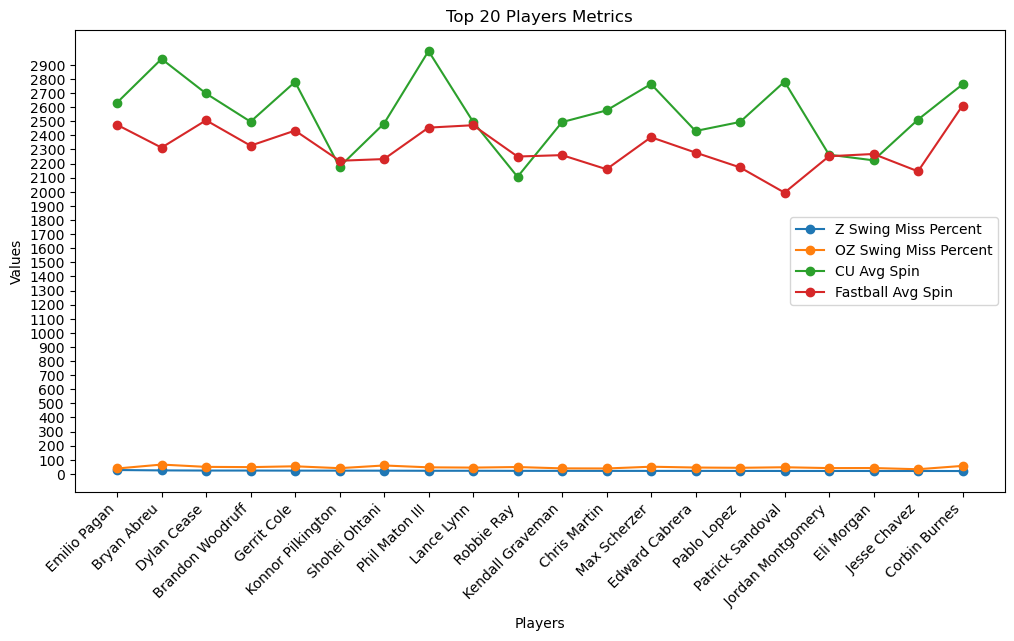

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def visual1():
    data = pd.read_csv("spinmiss.csv")
    df_20 = data.head(20)

    # Create a new column 'full_name' by combining 'first_name' and 'last_name'
    df_20["full_name"] = df_20[" first_name"] + " " + df_20["last_name"]

    # Set the index as 'full_name'
    df_20 = df_20.set_index("full_name")

    # Plot the line graph with four lines and points for each player
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(df_20.index, df_20["z_swing_miss_percent"], marker='o', label="Z Swing Miss Percent")
    ax.plot(df_20.index, df_20["oz_swing_miss_percent"], marker='o', label="OZ Swing Miss Percent")
    ax.plot(df_20.index, df_20["cu_avg_spin"], marker='o', label="CU Avg Spin")
    ax.plot(df_20.index, df_20["fastball_avg_spin"], marker='o', label="Fastball Avg Spin")

    # Set labels, title, and legend
    ax.set_xlabel("Players")
    ax.set_ylabel("Values")
    ax.set_title("Top 20 Players Metrics")
    ax.legend(loc='best')
    plt.xticks(rotation=45, ha='right')

    # Set the y-axis ticks
    max_value = max(df_20["z_swing_miss_percent"].max(), df_20["oz_swing_miss_percent"].max(), df_20["cu_avg_spin"].max(), df_20["fastball_avg_spin"].max())
    plt.yticks(np.arange(0, max_value, step=100))
    plt.savefig('visual1.png')
    plt.show()



############ Function Call ############
visual1()

### Visualization 1 Explanation

This Visialization shows the relationship between pitch spin and swing and miss percentage. The data I put into this graph was sorted by both swing and miss percentages. Since the swing and miss percentage is so small comapred to the spin rates it is hard to see the relationship but looking closely you can tell that there is not much correlation in spin and swing and miss percentage. 

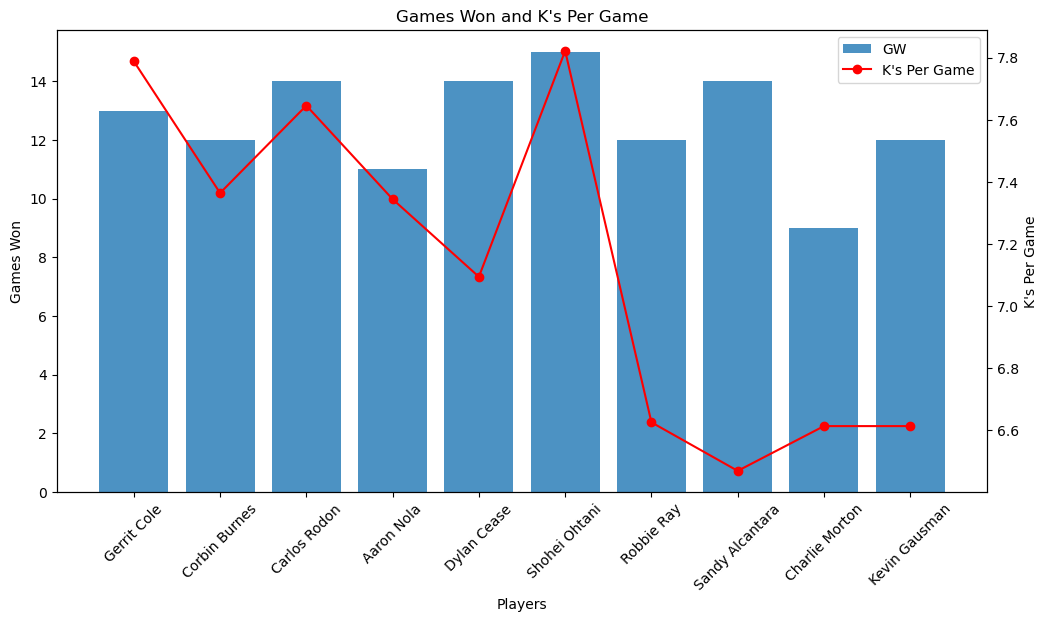

In [6]:
def visual2():
    data = pd.read_csv('GPGW.csv')
    df = pd.DataFrame(data)

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.bar(df["name"], df["GW"], label="GW", alpha=0.8)
    ax1.set_ylabel("Games Won")
    ax1.set_xlabel("Players")
    ax1.set_title("Games Won and K's Per Game")
    ax1.tick_params(axis='x', rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(df["name"], df["K's Per Game"], color='r', marker='o', label="K's Per Game")
    ax2.set_ylabel("K's Per Game")

    fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    plt.savefig('visual2.png')
    plt.show()


############ Function Call ############
visual2()

### Visualization 2 Explanation

This visualization shows that relationship between K's per game and games won. As you can see by looking at the legend, having a high K's per game does not necissarly mean you will win the most games. As you can see with Gerrit Cole he has the most strikeouts per game but he isnt even in the top 3 for most won games. 

/var/folders/96/hqyhzf2j4lgclt6415xv8__80000gn/T/ipykernel_99695/3042732225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20["full_name"] = df_20[" first_name"] + " " + df_20["\ufefflast_name"]
/var/folders/96/hqyhzf2j4lgclt6415xv8__80000gn/T/ipykernel_99695/3042732225.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_20.index, rotation=45, ha="right")


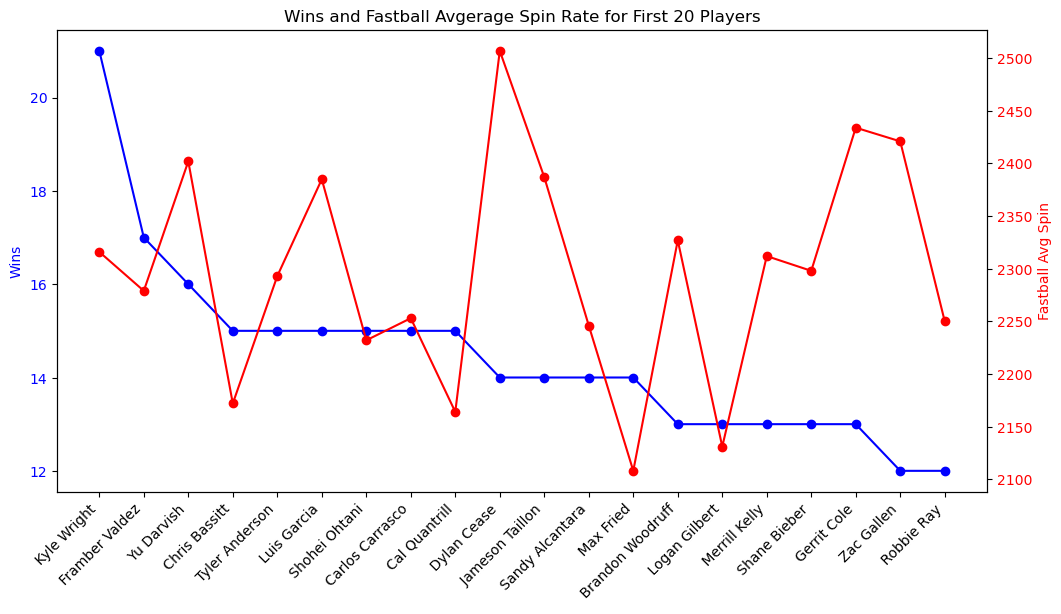

In [7]:
def visual3():
    data = pd.read_csv('WINSPIN.csv')
    data.drop('Unnamed: 0',axis=1, inplace = True)
    names = []

    df_20 = data.head(20)
    
    df_20["full_name"] = df_20[" first_name"] + " " + df_20["\ufefflast_name"]

    df_20 = df_20.set_index("full_name")

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(df_20.index, df_20["p_win"], marker='o', label="P_Win", color='b')
    ax1.set_ylabel("Wins", color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_xticklabels(df_20.index, rotation=45, ha="right")

    ax2 = ax1.twinx()
    ax2.plot(df_20.index, df_20["fastball_avg_spin"], marker='o', label="Fastball Avgerage Spin Rate", color='r')
    ax2.set_ylabel("Fastball Avg Spin", color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    ax1.set_title("Wins and Fastball Avgerage Spin Rate for First 20 Players")
    plt.savefig('visual3.png')
    plt.show()

############ Function Call ############
visual3()

### Visualization 3 Explanation

This visualization shows the relationship between spin rate and games. This graph shows how spin does not directlly correlate to wins. While spin can correlate to strikeouts, having a good defense can be more important than strikeouts as shows by Kyle Wright. While he did not have a high spin rate he still won many games because of his defense. 

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
